In [1]:
import random, math, os, time
import numpy as np
import sys; sys.path.append('..')
import pyzx as zx
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [6]:
x,y = [],[]
for i in range(1,101):
    gate_count = 100+i*23; x.append(gate_count)
    g = zx.generate.CNOT_HAD_PHASE_circuit(qubits=20, gates=gate_count, p_had=0.1, p_t=0.15,clifford=True).to_graph()
    t = time.time(); zx.simplify.clifford_simp(g,quiet=True)
    y.append(time.time()-t)
    if i%10 == 0: print(i,end='. ')

10. 20. 30. 40. 50. 60. 70. 80. 90. 100. 

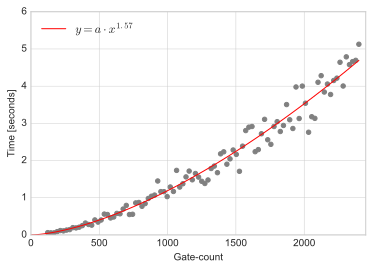

In [7]:
plt.style.use('seaborn-whitegrid')
x = np.array(x); y = np.array(y)
plt.scatter(x, y,color='grey')  #  Plot all the datapoints
c = np.polyfit(np.log(x),np.log(y),1, w=np.sqrt(y))  #  Generate power law fit
a = np.linspace(0,max(x),100); b = (math.e**c[1])*a**c[0]
plt.plot(a,b,'-',color='red',label="$y = a\cdot x^{{{:.2f}}}$".format(c[0]))  # Plot the fit
plt.ylim(ymin=0); plt.xlim(xmin=0,xmax=max(x)+50); 
plt.xlabel("Gate-count"); plt.ylabel("Time [seconds]"); plt.legend(loc='upper left');